In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy.linalg as npl
from scipy.optimize import minimize
import math as math
from itertools import combinations
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import Matern, RationalQuadratic,ExpSineSquared,PairwiseKernel
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
import csv
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import griddata
from scipy.spatial import distance_matrix
from scipy import interpolate
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [2]:
columns = ["x","y","z","w","data","error"]
datatab = pd.read_table("Updateddata.txt",names = columns)
datatab

x = datatab['x']
y = datatab['y']
z = datatab['z']
w = datatab['w']
data = datatab['data']
error = datatab['error']


# First dataset 
datam1 = datatab[0:250]
xm1 = datam1['x'].values
ym1 = datam1['y'].values
zm1 = datam1['z'].values
wm1 = datam1['w'].values
dm1 = datam1['data'].values
em1 = datam1['error'].values
X1 = np.column_stack((xm1, ym1, zm1, wm1))
X1_train, X1_test, D1_train, D1_test, E1_train, E1_test = train_test_split(X1,dm1.reshape(-1, 1),em1.reshape(-1,1),train_size=0.8,random_state=1)

# Second dataset
datam2 = datatab[250:500]
xm2 = datam2['x'].values
ym2 = datam2['y'].values
zm2 = datam2['z'].values
wm2 = datam2['w'].values
dm2 = datam2['data'].values
em2 = datam2['error'].values
X2 = np.column_stack((xm2, ym2, zm2, wm2))
X2_train, X2_test, D2_train, D2_test, E2_train, E2_test = train_test_split(X2, dm2.reshape(-1,1),em2.reshape(-1,1), train_size=0.8, random_state=3)

# Third dataset
datam3 = datatab[500:750]
xm3 = datam3['x'].values
ym3 = datam3['y'].values
zm3 = datam3['z'].values
wm3 = datam3['w'].values
dm3 = datam3['data'].values
em3 = datam3['error'].values
X3 = np.column_stack((xm3, ym3, zm3, wm3))
X3_train, X3_test, D3_train, D3_test,E3_train, E3_test = train_test_split(X3, dm3.reshape(-1,1),em3.reshape(-1,1), train_size=0.8, random_state=5)

# Fourth dataset
datam4 = datatab[750:]
xm4 = datam4['x'].values
ym4 = datam4['y'].values
zm4 = datam4['z'].values
wm4 = datam4['w'].values
dm4 = datam4['data'].values
em4 = datam4['error'].values
X4 = np.column_stack((xm4, ym4, zm4, wm4))
X4_train, X4_test, D4_train, D4_test,E4_train, E4_test = train_test_split(X4, dm4.reshape(-1,1),em4.reshape(-1,1), train_size=0.8, random_state=7)

X = np.column_stack((x,y, z, w))
D = np.concatenate((dm1,dm2,dm3,dm4))
E = np.concatenate((em1,em2,em3,em4))

X_train = np.concatenate((X1_train,X2_train,X3_train,X4_train))
X_test = np.concatenate((X1_test,X2_test,X3_test,X4_test))
D_train = np.concatenate((D1_train,D2_train,D3_train,D4_train))
D_test = np.concatenate((D1_test,D2_test,D3_test,D4_test))
#E_train = np.concatenate((E1_train.reshape(-1,1),E2_train.reshape(-1,1),E3_train.reshape(-1,1),E4_train.reshape(-1,1)))
E_train = np.concatenate((E1_train,E2_train,E3_train,E4_train))
print(E_train.shape)
print(D_train.shape)
E_test = np.concatenate((E1_test,E2_test,E3_test,E4_test))

(800, 1)
(800, 1)


# The kernels I will Investigate

## The Matern Kernel :
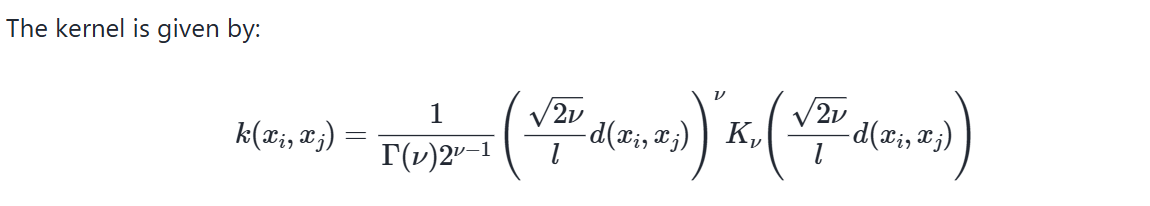

nu
float, default=1.5
The parameter nu controlling the smoothness of the learned function. The smaller nu, the less smooth the approximated function is. For nu=inf, the kernel becomes equivalent to the RBF kernel and for nu=0.5 to the absolute exponential kernel. Important intermediate values are nu=1.5 (once differentiable functions) and nu=2.5 (twice differentiable functions). Note that values of nu not in [0.5, 1.5, 2.5, inf] incur a considerably higher computational cost (appr. 10 times higher) since they require to evaluate the modified Bessel function. Furthermore, in contrast to l, nu is kept fixed to its initial value and not optimize

## The Rational Quadratic :
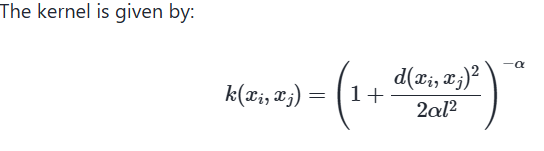

The RationalQuadratic kernel can be seen as a scale mixture (an infinite sum) of RBF kernels with different characteristic length scales. It is parameterized by a length scale parameter 
 and a scale mixture parameter 
. Only the isotropic variant where length_scale 
 is a scalar is supported at the mome

## ExpSine Kernel:
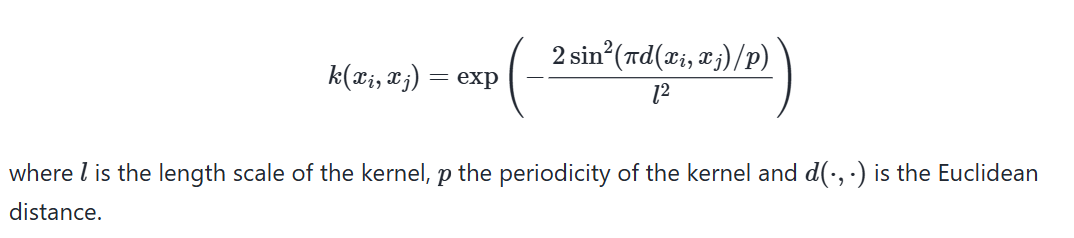

## Laplacian Kernel:
$$ K(x, y) = \exp\left(-\gamma \|x - y\|_1\right)$$

### Could add in the CHi Squared Kernel

## RBF Kernel :

$$
k(x_p, x_q) = \sigma^2 \exp\left(-\frac{\|x_p - x_q\|^2}{2\ell^2} \right)
$$

nt.d.


In [5]:
guess_signal_var = 1.0
bounds_signal_var = (1e-20, 1e20)

In [ ]:
bounds_lMat = ((1e-4, 100), (1e-4, 100), (1e-4, 100), (1e-4, 100))
guess_l = (1, 1, 1, 1)
nu_range = np.array([0.5, .75, 1, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])

LogLikeMatKern = np.zeros(len(nu_range))
rmse_valuesMatKern = np.zeros(len(nu_range))
mae_valuesMatKern = np.zeros(len(nu_range))
r2_valuesMatKern = np.zeros(len(nu_range))
adjusted_r2_valuesMatKern = np.zeros(len(nu_range))
fom_valuesMatKern = np.zeros(len(nu_range))

for i, nu in tqdm(enumerate(nu_range), total=len(nu_range), desc="Processing Matérn Kernels"):
    Matkernel = C(constant_value=guess_signal_var, constant_value_bounds=bounds_signal_var) * \
        Matern(length_scale=guess_l, length_scale_bounds=bounds_lMat, nu=nu)
    gpr = GaussianProcessRegressor(kernel=Matkernel, alpha=np.ravel(E_train**2), normalize_y=True, n_restarts_optimizer=2)
    gpr.fit(X_train, D_train)
    Dfit1 = gpr.predict(X1_test)

    rmse = np.sqrt(mean_squared_error(D1_test, Dfit1))
    mae = mean_absolute_error(D1_test, Dfit1)
    r2 = r2_score(D1_test, Dfit1)
    n = len(D1_test)
    p = X_train.shape[1]  # Number of predictors
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    sigma_y = np.std(D_train)
    fom = rmse / sigma_y


    LogLikeMatKern[i] = gpr.log_marginal_likelihood_value_
    rmse_valuesMatKern[i] = rmse
    mae_valuesMatKern[i] = mae
    r2_valuesMatKern[i] = r2
    adjusted_r2_valuesMatKern[i] = adjusted_r2
    fom_valuesMatKern[i] = fom
    
print("RMSE values:", rmse_valuesMatKern)
print("MAE values:", mae_valuesMatKern)
print("R-squared values:", r2_valuesMatKern)
print("Adjusted R-squared values:", adjusted_r2_valuesMatKern)
print("Figure of Merit values:", fom_valuesMatKern)

Processing Matérn Kernels:  60%|██████    | 6/10 [02:46<01:57, 29.36s/it]c:\Users\seanw\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
Processing Matérn Kernels: 100%|██████████| 10/10 [05:37<00:00, 33.71s/it]

RMSE values: [0.18665015 0.17862821 0.17348557 0.17070236 0.17077456 0.17106971
 0.1714396  0.17183947 0.17224222 0.17263679]
MAE values: [0.13413183 0.12845587 0.1252645  0.12402896 0.1241423  0.12432369
 0.12459979 0.12487147 0.12523635 0.12558544]
R-squared values: [0.56348064 0.60019619 0.62288524 0.6348882  0.63457929 0.63331507
 0.63172766 0.6300077  0.62827133 0.62656629]
Adjusted R-squared values: [0.52467892 0.56465808 0.58936393 0.60243382 0.60209745 0.60072086
 0.59899234 0.59711949 0.59522879 0.59337218]
Figure of Merit values: [0.51498428 0.49285105 0.47866204 0.47098292 0.47118212 0.47199647
 0.47301702 0.47412032 0.47523153 0.47632018]


In [8]:
bounds_l = (1e-4, 10)
guess_l = 1
alpha_range = np.linspace(0.1, 3, 10)

LogLikeRadKern = np.zeros(len(alpha_range))
rmse_valuesRadKern = np.zeros(len(alpha_range))
mae_valuesRadKern = np.zeros(len(alpha_range))
r2_valuesRadKern = np.zeros(len(alpha_range))
adjusted_r2_valuesRadKern = np.zeros(len(alpha_range))
fom_valuesRadKern = np.zeros(len(alpha_range))

for i, alpha in tqdm(enumerate(alpha_range), total=len(alpha_range), desc="Processing Rational Quadratic Kernels"):
    Radkernel = C(constant_value=guess_signal_var, constant_value_bounds=bounds_signal_var) * \
                RationalQuadratic(length_scale=guess_l, alpha=alpha, length_scale_bounds=bounds_l)
    gpr = GaussianProcessRegressor(kernel=Radkernel, alpha=np.ravel(E_train**2), normalize_y=True, n_restarts_optimizer=10)
    gpr.fit(X_train, D_train)
    Dfit1 = gpr.predict(X1_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(D1_test, Dfit1))
    mae = mean_absolute_error(D1_test, Dfit1)
    r2 = r2_score(D1_test, Dfit1)
    n = len(D1_test)
    p = X_train.shape[1]  # Number of predictors
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    sigma_y = np.std(D_train)
    fom = rmse / sigma_y

    # Store metrics
    LogLikeRadKern[i] = gpr.log_marginal_likelihood_value_
    rmse_valuesRadKern[i] = rmse
    mae_valuesRadKern[i] = mae
    r2_valuesRadKern[i] = r2
    adjusted_r2_valuesRadKern[i] = adjusted_r2
    fom_valuesRadKern[i] = fom

print("RMSE values:", rmse_valuesRadKern)
print("MAE values:", mae_valuesRadKern)
print("R-squared values:", r2_valuesRadKern)
print("Adjusted R-squared values:", adjusted_r2_valuesRadKern)
print("Figure of Merit values:", fom_valuesRadKern)

Processing Rational Quadratic Kernels: 100%|██████████| 10/10 [02:16<00:00, 13.66s/it]

RMSE values: [0.18227885 0.18227888 0.18227883 0.18227884 0.18227889 0.18227893
 0.18227887 0.18227886 0.18227862 0.18227883]
MAE values: [0.13856147 0.13856139 0.13856136 0.13856137 0.1385614  0.13856143
 0.13856137 0.13856138 0.13856126 0.13856136]
R-squared values: [0.58368758 0.58368744 0.58368763 0.5836876  0.58368738 0.58368718
 0.58368749 0.58368752 0.58368863 0.58368763]
Adjusted R-squared values: [0.54668203 0.54668188 0.54668209 0.54668205 0.54668181 0.5466816
 0.54668193 0.54668197 0.54668318 0.54668209]
Figure of Merit values: [0.50292347 0.50292356 0.50292344 0.50292346 0.50292359 0.50292371
 0.50292353 0.50292351 0.50292284 0.50292344]


In [9]:
bounds_l = (1e-4, 10)
guess_l = 1
periodicity_range = np.linspace(0.1, 3, 10)

LogLikeExpSineKern = np.zeros(len(periodicity_range))
rmse_valuesSineKern = np.zeros(len(periodicity_range))
mae_valuesSineKern = np.zeros(len(periodicity_range))
r2_valuesSineKern = np.zeros(len(periodicity_range))
adjusted_r2_valuesSineKern = np.zeros(len(periodicity_range))
fom_valuesSineKern = np.zeros(len(periodicity_range))

for i, periodicity in tqdm(enumerate(periodicity_range), total=len(periodicity_range), desc="Processing ExpSineSquared Kernels"):
    ExpSinekernel = C(constant_value=guess_signal_var, constant_value_bounds=bounds_signal_var) * \
                    ExpSineSquared(length_scale=guess_l, periodicity=periodicity, length_scale_bounds=bounds_l)
    gpr = GaussianProcessRegressor(kernel=ExpSinekernel, alpha=np.ravel(E_train**2), normalize_y=True, n_restarts_optimizer=10)
    gpr.fit(X_train, D_train)
    Dfit1 = gpr.predict(X1_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(D1_test, Dfit1))
    mae = mean_absolute_error(D1_test, Dfit1)
    r2 = r2_score(D1_test, Dfit1)
    n = len(D1_test)
    p = X_train.shape[1]  # Number of predictors
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    sigma_y = np.std(D_train)
    fom = rmse / sigma_y

    # Store metrics
    LogLikeExpSineKern[i] = gpr.log_marginal_likelihood_value_
    rmse_valuesSineKern[i] = rmse
    mae_valuesSineKern[i] = mae
    r2_valuesSineKern[i] = r2
    adjusted_r2_valuesSineKern[i] = adjusted_r2
    fom_valuesSineKern[i] = fom

print("RMSE values:", rmse_valuesSineKern)
print("MAE values:", mae_valuesSineKern)
print("R-squared values:", r2_valuesSineKern)
print("Adjusted R-squared values:", adjusted_r2_valuesSineKern)
print("Figure of Merit values:", fom_valuesSineKern)

Processing ExpSineSquared Kernels: 100%|██████████| 10/10 [01:36<00:00,  9.65s/it]

RMSE values: [0.17871042 0.17871033 0.17871009 0.17871049 0.28843221 0.23974358
 0.28847187 0.17871033 0.17871175 0.16126722]
MAE values: [0.13748065 0.13748061 0.13748042 0.13748066 0.25370766 0.16108962
 0.25363457 0.13748058 0.13748165 0.13073865]
R-squared values: [ 0.59982813  0.59982854  0.5998296   0.5998278  -0.04239987  0.27982043
 -0.0426865   0.59982853  0.59982217  0.67413403]
Adjusted R-squared values: [ 0.56425729  0.56425774  0.56425889  0.56425694 -0.13505764  0.21580447
 -0.13536975  0.56425773  0.5642508   0.64516817]
Figure of Merit values: [0.49307786 0.49307761 0.49307696 0.49307806 0.79581001 0.66147376
 0.79591942 0.49307761 0.49308153 0.44495053]


In [ ]:
bounds_l = (1e-4, 10)
guess_l = 1
gamma_range = np.linspace(0.1, 3, 10)

LogLikeLaplaceKern = np.zeros(len(gamma_range))
rmse_valuesLaplaceKern = np.zeros(len(gamma_range))
mae_valuesLaplaceKern = np.zeros(len(gamma_range))
r2_valuesLaplaceKern = np.zeros(len(gamma_range))
adjusted_r2_valuesLaplaceKern = np.zeros(len(gamma_range))
fom_valuesLaplaceKern = np.zeros(len(gamma_range))

for i, gamma in tqdm(enumerate(gamma_range), total=len(gamma_range), desc="Processing Laplace Kernels"):
    Laplacekernel = C(constant_value=guess_signal_var, constant_value_bounds=bounds_signal_var) * \
                    PairwiseKernel(gamma=gamma, metric='laplacian')
    gpr = GaussianProcessRegressor(kernel=Laplacekernel, alpha=np.ravel(E_train**2), normalize_y=True, n_restarts_optimizer=10)
    gpr.fit(X_train, D_train)
    Dfit1 = gpr.predict(X1_test)
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(D1_test, Dfit1))
    mae = mean_absolute_error(D1_test, Dfit1)
    r2 = r2_score(D1_test, Dfit1)
    n = len(D1_test)
    p = X_train.shape[1]  # Number of predictors
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    sigma_y = np.std(D_train)
    fom = rmse / sigma_y

    # Store metrics
    LogLikeLaplaceKern[i] = gpr.log_marginal_likelihood_value_
    rmse_valuesLaplaceKern[i] = rmse
    mae_valuesLaplaceKern[i] = mae
    r2_valuesLaplaceKern[i] = r2
    adjusted_r2_valuesLaplaceKern[i] = adjusted_r2
    fom_valuesLaplaceKern[i] = fom

print("RMSE values:", rmse_valuesLaplaceKern)
print("MAE values:", mae_valuesLaplaceKern)
print("R-squared values:", r2_valuesLaplaceKern)
print("Adjusted R-squared values:", adjusted_r2_valuesLaplaceKern)
print("Figure of Merit values:", fom_valuesLaplaceKern)

Processing Laplace Kernels:   0%|          | 0/10 [00:00<?, ?it/s]c:\Users\seanw\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
Processing Laplace Kernels:  20%|██        | 2/10 [00:22<01:23, 10.42s/it]c:\Users\seanw\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
Processing Laplace Kernels:  50%|█████     | 5/10 [00:45<00:41,  8.34s/it]c:\Users\seanw\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663:

RMSE values: [0.17838516 0.17838467 0.17838493 0.1783849  0.1783858  0.17838518
 0.17838526 0.17838519 0.17838507 0.17838501]
MAE values: [0.12371722 0.12371688 0.12371713 0.12371711 0.12371765 0.12371731
 0.12371737 0.12371743 0.12371723 0.12371717]
R-squared values: [0.60128346 0.60128564 0.60128448 0.60128459 0.60128059 0.60128336
 0.60128298 0.60128329 0.60128386 0.6012841 ]
Adjusted R-squared values: [0.56584198 0.56584437 0.5658431  0.56584322 0.56583887 0.56584188
 0.56584147 0.56584181 0.56584242 0.56584268]
Figure of Merit values: [0.49218044 0.49217909 0.49217981 0.49217974 0.49218221 0.4921805
 0.49218073 0.49218054 0.49218019 0.49218004]


In [16]:
RBFkernel = C(constant_value=guess_signal_var, constant_value_bounds=bounds_signal_var) * \
RBF(length_scale=guess_l, length_scale_bounds=bounds_l)
gpr = GaussianProcessRegressor(kernel=RBFkernel,alpha=np.ravel(E_train**2),normalize_y=True, n_restarts_optimizer=10)
gpr.fit(X_train, D_train)
Dfit1, Dstd1 = gpr.predict(X1_test, return_std=True)
#Error = 1/50*np.linalg.norm(Dfit1-D1_test,ord=2)
rmse = np.sqrt(mean_squared_error(D1_test, Dfit1))
mae = mean_absolute_error(D1_test, Dfit1)
r2 = r2_score(D1_test, Dfit1)
n = len(D1_test)
p = X_train.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
sigma_y = np.std(D_train)
fom = rmse / sigma_y
LogLikeRBFKern = gpr.log_marginal_likelihood_value_
rmse_RBFKern = rmse
mae_RBFKern = mae
r2_RBFKern = r2
adjusted_r2_RBFKern = adjusted_r2
fom_RBFKern = fom


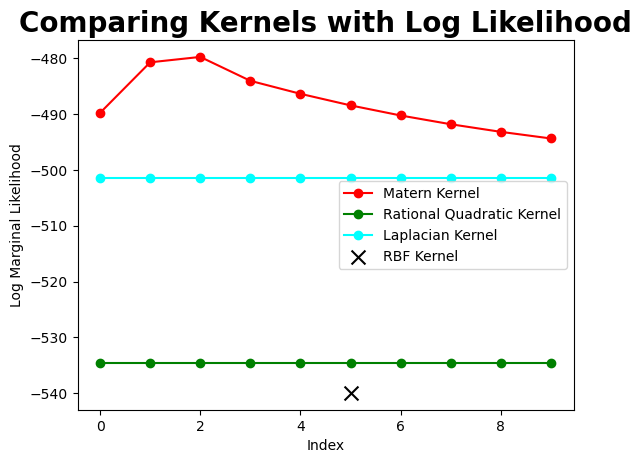

In [17]:
indices = np.arange(len(LogLikeMatKern))  

plt.plot(indices, LogLikeMatKern, '-o', color='red', label='Matern Kernel')
plt.plot(indices, LogLikeRadKern, '-o', color='green', label='Rational Quadratic Kernel')
#plt.plot(indices, LogLikeExpSineKern, '-o', color='blue', label='Exp Sine Kernel')
plt.plot(indices, LogLikeLaplaceKern, '-o', color='cyan', label='Laplacian Kernel')

plt.scatter(5, LogLikeRBFKern, color='black', label='RBF Kernel', s=100, marker='x')

# Formatting
plt.legend()
plt.xlabel("Index")
plt.ylabel("Log Marginal Likelihood")
plt.title('Comparing Kernels with Log Likelihood', size=20, weight='bold')

# Show plot
plt.show()


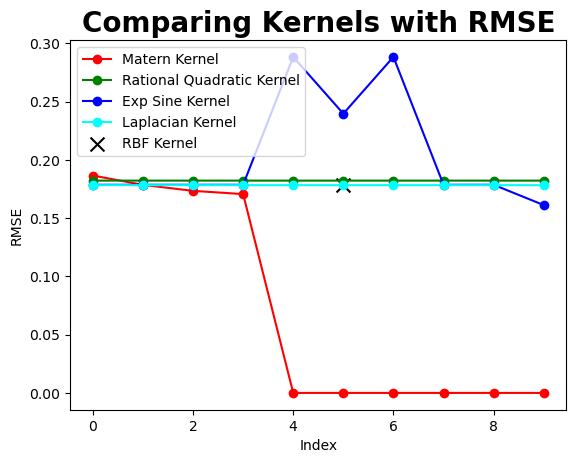

In [18]:
plt.plot(indices, rmse_values, '-o', color='red', label='Matern Kernel')
plt.plot(indices, rmse_valuesRadKern, '-o', color='green', label='Rational Quadratic Kernel')
plt.plot(indices, rmse_valuesSineKern, '-o', color='blue', label='Exp Sine Kernel')
plt.plot(indices, rmse_valuesLaplaceKern, '-o', color='cyan', label='Laplacian Kernel')
plt.scatter(5, rmse_RBFKern, color='black', label='RBF Kernel', s=100, marker='x')
plt.legend()
plt.xlabel("Index")
plt.ylabel("RMSE")
plt.title('Comparing Kernels with RMSE', size=20, weight='bold')
plt.show()

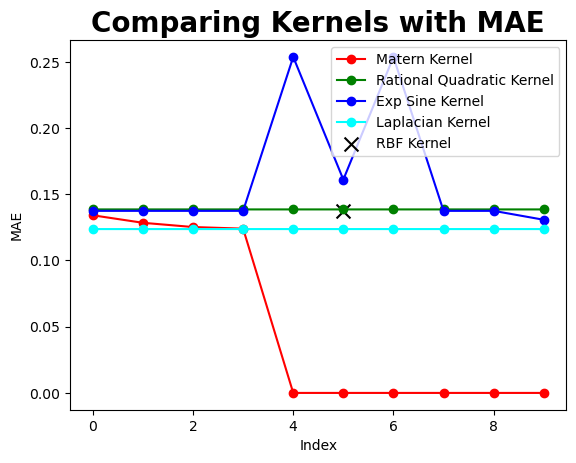

In [19]:
plt.plot(indices, mae_values, '-o', color='red', label='Matern Kernel')
plt.plot(indices, mae_valuesRadKern, '-o', color='green', label='Rational Quadratic Kernel')
plt.plot(indices, mae_valuesSineKern, '-o', color='blue', label='Exp Sine Kernel')
plt.plot(indices, mae_valuesLaplaceKern, '-o', color='cyan', label='Laplacian Kernel')
plt.scatter(5, mae_RBFKern, color='black', label='RBF Kernel', s=100, marker='x')
plt.legend()
plt.xlabel("Index")
plt.ylabel("MAE")
plt.title('Comparing Kernels with MAE', size=20, weight='bold')
plt.show()

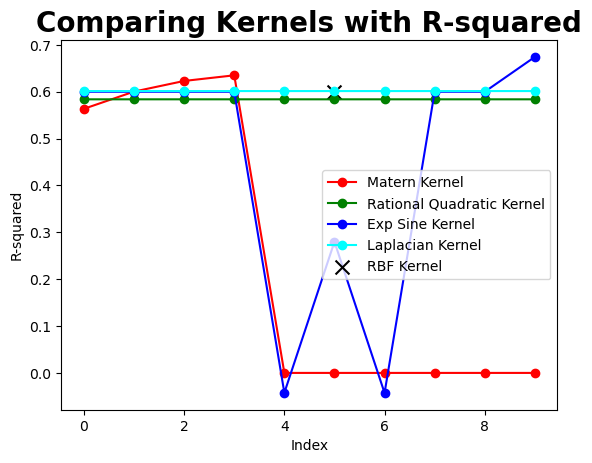

In [20]:
plt.plot(indices, r2_values, '-o', color='red', label='Matern Kernel')
plt.plot(indices, r2_valuesRadKern, '-o', color='green', label='Rational Quadratic Kernel')
plt.plot(indices, r2_valuesSineKern, '-o', color='blue', label='Exp Sine Kernel')
plt.plot(indices, r2_valuesLaplaceKern, '-o', color='cyan', label='Laplacian Kernel')
plt.scatter(5, r2_RBFKern, color='black', label='RBF Kernel', s=100, marker='x')
plt.legend()
plt.xlabel("Index")
plt.ylabel("R-squared")
plt.title('Comparing Kernels with R-squared', size=20, weight='bold')
plt.show()

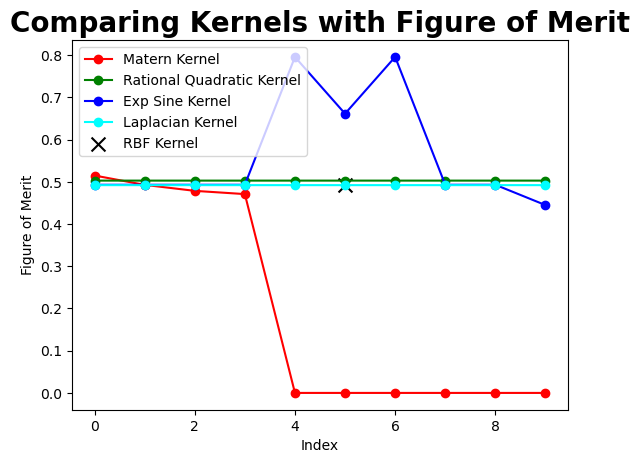

In [21]:
plt.plot(indices, fom_values, '-o', color='red', label='Matern Kernel')
plt.plot(indices, fom_valuesRadKern, '-o', color='green', label='Rational Quadratic Kernel')
plt.plot(indices, fom_valuesSineKern, '-o', color='blue', label='Exp Sine Kernel')
plt.plot(indices, fom_valuesLaplaceKern, '-o', color='cyan', label='Laplacian Kernel')
plt.scatter(5, fom_RBFKern, color='black', label='RBF Kernel', s=100, marker='x')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Figure of Merit")
plt.title('Comparing Kernels with Figure of Merit', size=20, weight='bold')
plt.show()